### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:


# lee el archivo .tsv en un dataframe
df = pd.DataFrame

In [3]:
df = pd.read_csv(r'C:\Users\joseb\Documents\the_bridge\ONLINE_DS_THEBRIDGE_jbenegasb\modulo_1\2509_dsft_thebridge\3-Machine Learning\2-No_Supervisado\1-Clustering\Practica\data\drugLibTrain_raw.tsv', sep='\t')
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (10 como mucho)

In [4]:
# vamos a ver que columnas son utiles ( pocas categorias o numericas)
# Vamos a ver qué columnas son útiles (pocas categorías o numéricas)
print("Valores únicos por columna:")
print(df.nunique())

# Seleccionamos columnas objetivo.
# 'rating' es numérica.
# 'effectiveness', 'sideEffects' parecen tener pocas categorías (niveles).
# 'urlDrugName' y 'condition' tienen muchas, las descartaremos por ahora para simplificar.
# Las columnas de texto libre ('benefitsReview', etc.) no sirven para K-Means directo.


df_clean = df[['rating', 'effectiveness', 'sideEffects']].copy()

print("\nDataFrame filtrado:")
df_clean.head()

Valores únicos por columna:
Unnamed: 0           3107
urlDrugName           502
rating                 10
effectiveness           5
sideEffects             5
condition            1426
benefitsReview       3031
sideEffectsReview    2813
commentsReview       3046
dtype: int64

DataFrame filtrado:


,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects


<function matplotlib.pyplot.show(close=None, block=None)>

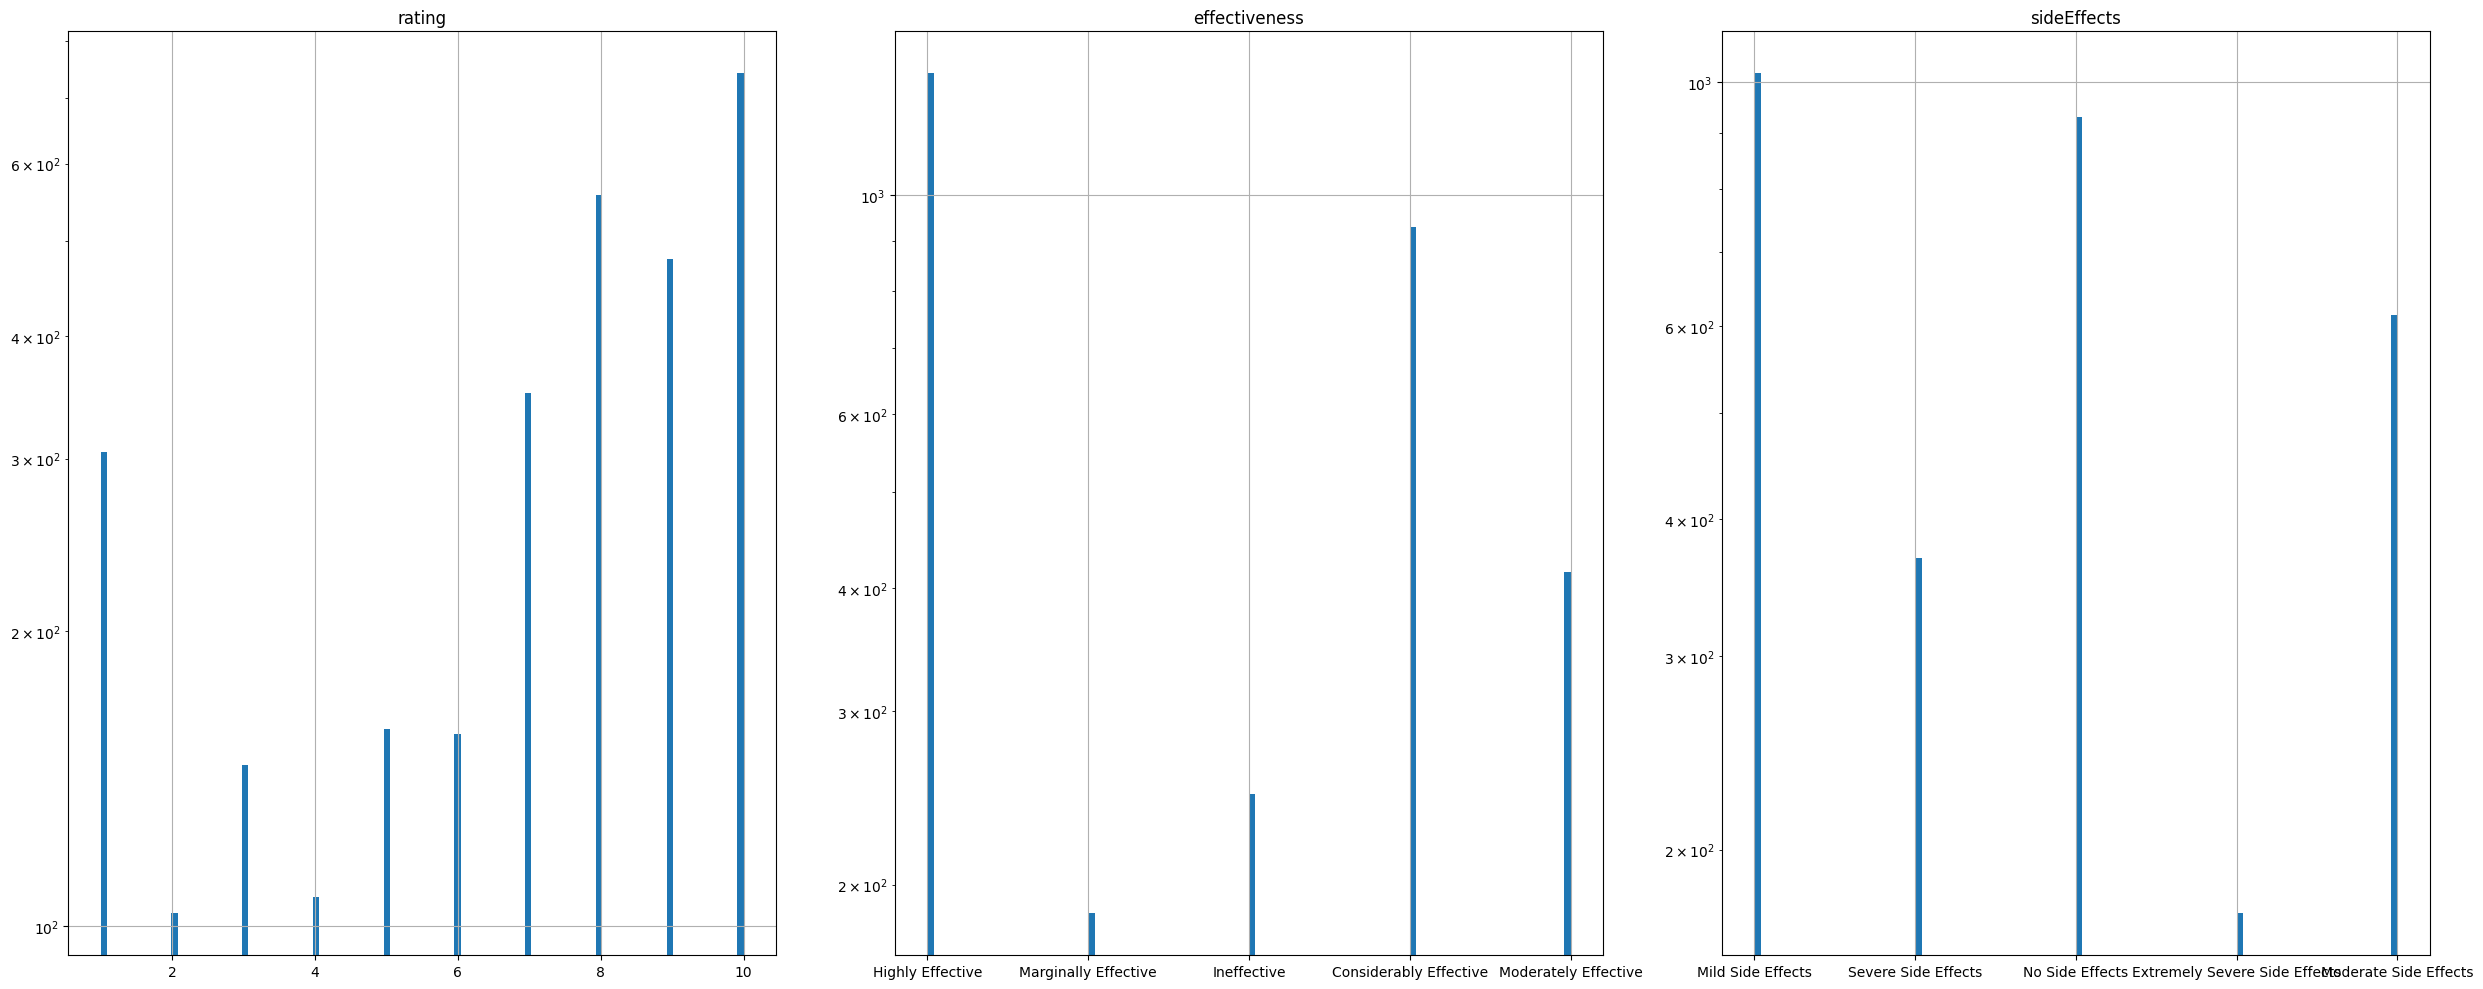

In [8]:
# diagramas de barras para las frecuencias acumuladas de las categorías

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(25,10))

for n, c in enumerate(df_clean.columns):
  ax = figure.add_subplot(1,3,n+1)
  ax.set_title(c)
  ax.set_yscale("log") #the log scale help us to have a better idea of our data when the distribution is not fair
  df[c].hist(ax=ax, bins=100)

figure.tight_layout() #this feature separate the graphs correctly
plt.show

#### Transforma las columnas categoricas

Transforma las columnas categóricas no codificadas a numéricas mediante dummies.

In [11]:
df_encoded = pd.get_dummies(df_clean, drop_first=False)
df_encoded.head()

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,4,False,True,False,False,False,False,True,False,False,False
1,1,False,True,False,False,False,False,False,False,False,True
2,10,False,True,False,False,False,False,False,False,True,False
3,3,False,False,False,True,False,False,True,False,False,False
4,2,False,False,False,True,False,False,False,False,False,True


#### Evalúa cuál es la mejor K

Utiliza silhouette_score para evaluar cuál es la mejor K. Evalúa como mucho K = 20

#### Genera el K Means 

In [14]:
'''
K-Means requiere que le digamos cuantos grupos (K) queremos. 
No sabemos a priori si los farmacos se agrupan mejor en 3,5 o 10 grupos.
Para averiguarlo, probamos varios K y medimos que tan "buenos" son los grupos usando
el silhouette score.
- Silhuette Score: Mide que tan similar es un punto a su propio grupo (cohesion) comparado
con los otros grupos (separacion)
    - Valor cercano a +1: el punto esta muy bien clasificado
    - Valor cercano a 0: el punto esta en el limite entre dos grupos 
    - Valor negativo: El punto probablemente esta en el grupo incorrecto

    Nota: calcular la silueta es costoso computacionalmente, si tarda mucho, reduce el rango
    de K o usa una muestra de los datos.
'''

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rango de K a probar 
k_range = range(2 , 21) # Empezamos con 2 porque 1 no tiene sentido
silhouette_scores = []
inertias = [] #tambien guardamos la inercia (suma dde distancias al cuadrado)

for k in k_range:
    # Creamos y entrenamos el modelo
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded)
    
    # Guardamos inercia (método del codo)
    inertias.append(kmeans.inertia_)
    
    # Guardamos silhouette score
    # Usamos una muestra si el dataset fuera gigante, pero aquí 3000 filas es manejable
    score = silhouette_score(df_encoded, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")



K=2, Silhouette Score=0.6055
K=3, Silhouette Score=0.4382
K=4, Silhouette Score=0.3971
K=5, Silhouette Score=0.3884
K=6, Silhouette Score=0.3674
K=7, Silhouette Score=0.3772
K=8, Silhouette Score=0.3978
K=9, Silhouette Score=0.4059
K=10, Silhouette Score=0.4192
K=11, Silhouette Score=0.4201
K=12, Silhouette Score=0.4586
K=13, Silhouette Score=0.4894
K=14, Silhouette Score=0.4622
K=15, Silhouette Score=0.5139
K=16, Silhouette Score=0.4804
K=17, Silhouette Score=0.5145
K=18, Silhouette Score=0.5246
K=19, Silhouette Score=0.5356
K=20, Silhouette Score=0.5409


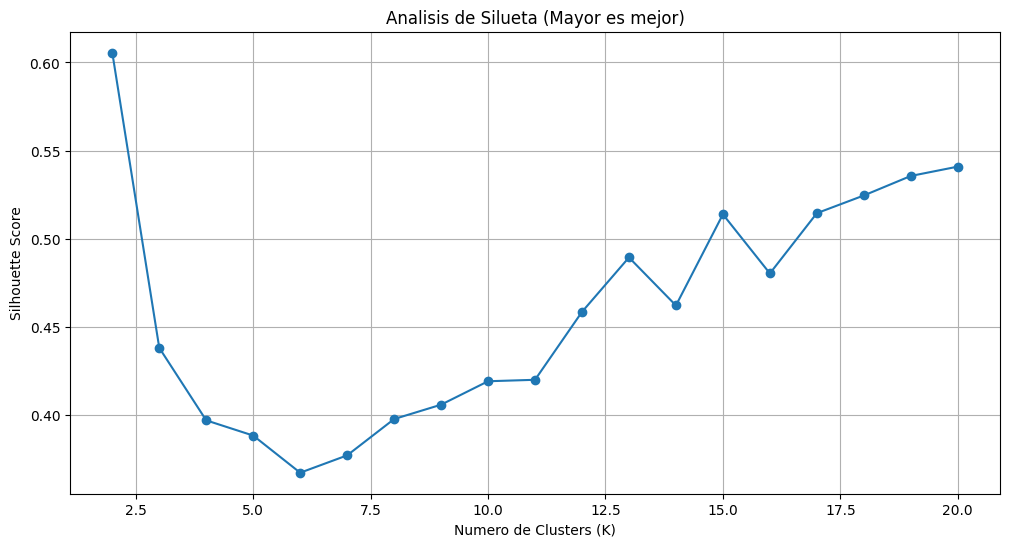

In [19]:
plt.figure(figsize=(12,6))

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Numero de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Analisis de Silueta (Mayor es mejor)')
plt.grid(True)

plt.show()

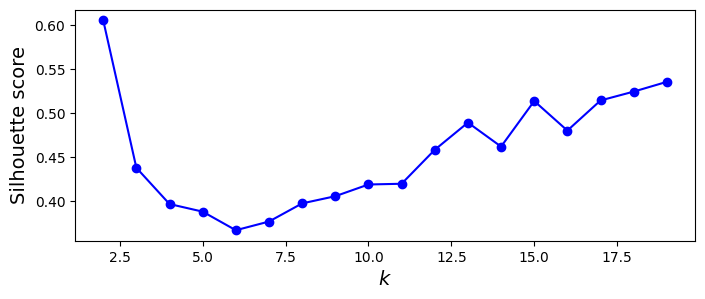

In [ ]:
# pinta los scores de silueta para cada k

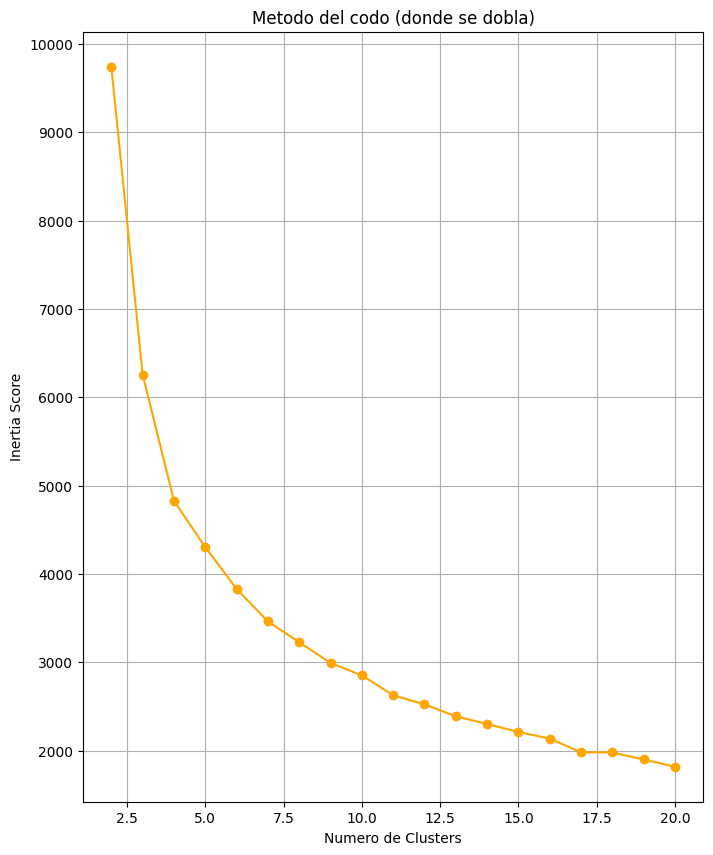

In [20]:
plt.figure(figsize=(8,10))
plt.plot(k_range, inertias, marker='o', color= 'orange')
plt.xlabel('Numero de Clusters')
plt.ylabel('Inertia Score')
plt.title('Metodo del codo (donde se dobla)')
plt.grid(True)

plt.show()

Text(0, 0.5, 'Inertia')

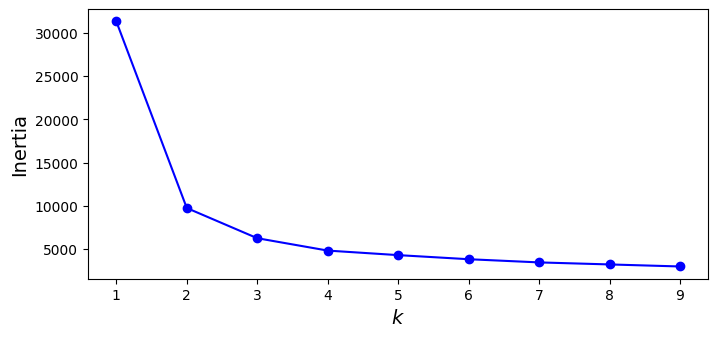

In [ ]:
# pinta las inercias para cada k

In [22]:
'''
Basandonos en las graficas
(k= 2 es el pico mas alto de la silueta)
elegimos ese numero y entrenamos el modelo definitivo.
Luego asignamos a cada farmacos su etiqueta de grupo
'''
#seleccionamos el mejor k automaticamente (el que tuvo mayor silueta)
best_k = k_range[np.argmax(silhouette_scores)]
print(f'El mejor K segun la silueta es: {best_k}')

#entrenamos el modelo final 
kmeans_final = KMeans(n_clusters = best_k, random_state=42, n_init=10)
kmeans_final.fit(df_encoded)

#agregamos los clusters al dataframe original para analizar 
df['Cluster'] = kmeans_final.labels_

print("Modelos entrenado y clusters asignados")
df[['rating', 'effectiveness', 'sideEffects', 'Cluster']].head()

El mejor K segun la silueta es: 2
Modelos entrenado y clusters asignados


,rating,effectiveness,sideEffects,Cluster
0,4,Highly Effective,Mild Side Effects,1
1,1,Highly Effective,Severe Side Effects,1
2,10,Highly Effective,No Side Effects,0
3,3,Marginally Effective,Mild Side Effects,1
4,2,Marginally Effective,Severe Side Effects,1


#### Muestra en un gráfico de quesito la distribución de los distintos clusters

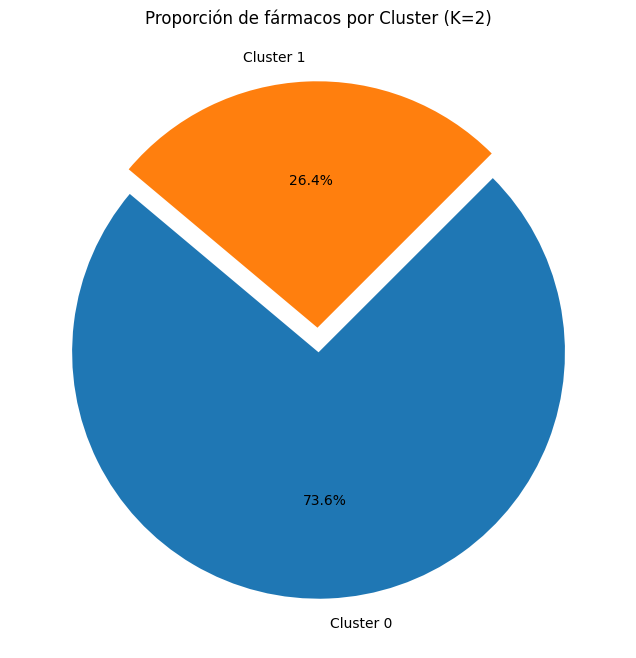

In [23]:
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, 
        labels=[f'Cluster {i}' for i in cluster_counts.index], 
        autopct='%1.1f%%', 
        startangle=140,
        explode=[0.05]*len(cluster_counts)) # Separa un poco los trozos

plt.title(f'Proporción de fármacos por Cluster (K={best_k})')
plt.show()

<Axes: ylabel='count'>

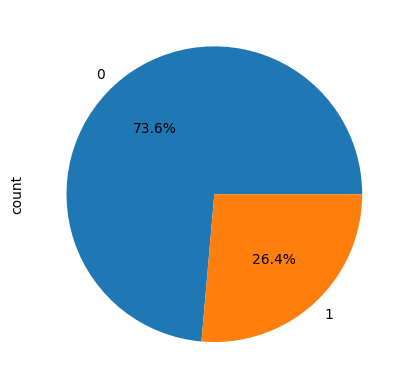

In [ ]:


# a partir del kmeans calculado, muestra la proporción de clusters en un diagrama de quesito
